In [2]:
import h5py
import numpy as np
import pandas as pd 
import os
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [3]:
def convert_csv_to_txt(input_file,output_file):
   
    with open(input_file, 'r') as csv_file, open(output_file, 'w') as space_delimited_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            space_delimited_file.write(' '.join(row) + '\n')

    print(f'CSV file "{input_file}" converted to space-delimited file "{output_file}"')


In [4]:
def read_file(file):
    hf = h5py.File(file, 'r')
    attributes = []
    for key in hf.keys():
        attributes.append(key)
    
    return attributes, hf

In [5]:
def get_data(hf,attributes):
    data = []
    pm = []
    acc_pm = []
    loss_pm = []
    loss_gm = []
    for i in range(len(attributes)):
        ai = hf.get(attributes[i])
        ai = np.array(ai)
        data.append(ai)
    
    return data


In [34]:
def plot_convergence(df_loss, df_accuracy, fig_path):
    head_value = 1000
    mag_head = 100
    df_loss = df_loss.head(head_value)
    df_accuracy = df_accuracy.head(head_value)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjusted for better display
    
    # Define a list of colors for the plots
    colors = ['green', 'magenta', 'black', 'red']
    
    handles, labels = [], []
    dfs = [(df_loss, 'log'), (df_accuracy, 'linear')]
    manual_location_loss = (-0.02, 0.0, 1.0, 1.0)
    manual_location_acc = (0.0, 0.2, 1.0, 1.0)
    
    for ax_index, (df, scale_type) in enumerate(dfs):
        ax = axs[ax_index]
        for col, color in zip(sorted(df.columns), colors):  # Sorting columns and using colors
            line, = ax.plot(df.index, df[col], label=col, color=color)  # Set color manually
            handles.append(line)
            labels.append(col)

        ax.set_xticks(range(0, head_value+1, int(head_value/5))) # Setting x-axis ticks
        ax.tick_params(axis='x', labelsize=16)  
        ax.tick_params(axis='y', labelsize=16)
        ax.grid(True)
        ax.set_yscale(scale_type)  # Set y-axis scale

        # Add inset for the df_loss plot
        if ax_index == 0:  # Assuming df_loss is the first plot
         """   axins = inset_axes(ax, width="50%", height="50%",bbox_to_anchor=manual_location_loss, loc='upper right', bbox_transform=ax.transAxes)
            df = df.head(mag_head)
            for col, color in zip(sorted(df.columns), colors):
                axins.plot(df.index, df[col], color=color)
                axins.set_yscale('log')
            # Customize the inset plot (e.g., set ticks) based on your data range
            axins.set_xticks(range(0, mag_head+1, int(mag_head/5)))
            axins.set_yticks([])
            axins.tick_params(axis='x', labelsize=14)  
            axins.tick_params(axis='y', labelsize=14)"""
    
        # Add inset for the df_loss plot
       
        if ax_index == 1:  # Assuming df_loss is the first plot
            
            axins = inset_axes(ax, width="50%", height="50%",bbox_to_anchor=manual_location_acc, loc='lower right', bbox_transform=ax.transAxes)
            df = df.head(mag_head)
            for col, color in zip(sorted(df.columns), colors):
                axins.plot(df.index, df[col], color=color)
                axins.set_yscale('log')
            # Customize the inset plot (e.g., set ticks) based on your data range
            axins.set_xticks(range(0, mag_head+1, int(mag_head/2)))
            axins.set_yticks([])
            axins.tick_params(axis='x', labelsize=14)  
            axins.tick_params(axis='y', labelsize=14)
        

    unique_handles, unique_labels = [], []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_handles.append(handle)
            unique_labels.append(label)

    indexes = ['Validation Loss', 'Validation Accuracy']
    
    fontsize = 20
    for i, ax in enumerate(axs):
        ax.set_ylabel(indexes[i], fontsize=fontsize)
        ax.set_xlabel('Global Iteration', fontsize=fontsize)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.subplots_adjust(top=0.87)
    legend_fontsize = 20  # Specify font size
    fig.legend(unique_handles, unique_labels, loc='upper center', ncol=4, title="", fontsize=legend_fontsize, title_fontsize=legend_fontsize)
    
    plt.draw()
    plt.savefig(fig_path + 'loss_plot.png', bbox_inches='tight', dpi=300)
    plt.show()


In [26]:
def convergence_analysis(paths, fig_path, column_name):
    df_loss = pd.DataFrame()
    df_accuracy = pd.DataFrame()
    df_gap = pd.DataFrame()

    for i, path in enumerate(paths):
        dir_list = os.listdir(path)
        for file_name in dir_list:
            print(path)
            print(column_name[i])
            if file_name.endswith(".h5"):

                attributes, hf = read_file(path+file_name)

                data = get_data(hf,attributes)
                #id=0
                for key in hf.keys():
                    attributes.append(key)
                # print("id [",id,"] :", key)
                #id+=1
                    
                val_loss = np.array(hf.get('global_test_loss'))
                #print(f"val_loss : {val_loss}")
                val_acc = np.array(hf.get('global_test_accuracy'))
                #print(val_acc)
                #print(f"val_acc : {val_acc}")
                # gap = np.array(hf.get('fw_gap'))
                    
                df_loss[column_name[i]] = val_loss[:1000]
                df_accuracy[column_name[i]] = val_acc[:1000]
    #print(df_loss)
    #print(df_accuracy)       
    plot_convergence(df_loss, df_accuracy, fig_path)

/proj/sourasb-220503/codebase/FedFWplus/results/FedDR/SYNTHETIC/MCLR/perf/norm_1/10/
FedDR
/proj/sourasb-220503/codebase/FedFWplus/results/FedDR/SYNTHETIC/MCLR/perf/norm_1/10/
FedDR
/proj/sourasb-220503/codebase/FedFWplus/results/FedFW/SYNTHETIC/MCLR/perf/lmo_l1/3/
FedFW
/proj/sourasb-220503/codebase/FedFWplus/results/FedFW_Plus/MNIST/MCLR/perf/lmo_l1/3/best/
FedFW+


/tmp/ipykernel_3057411/3866965096.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


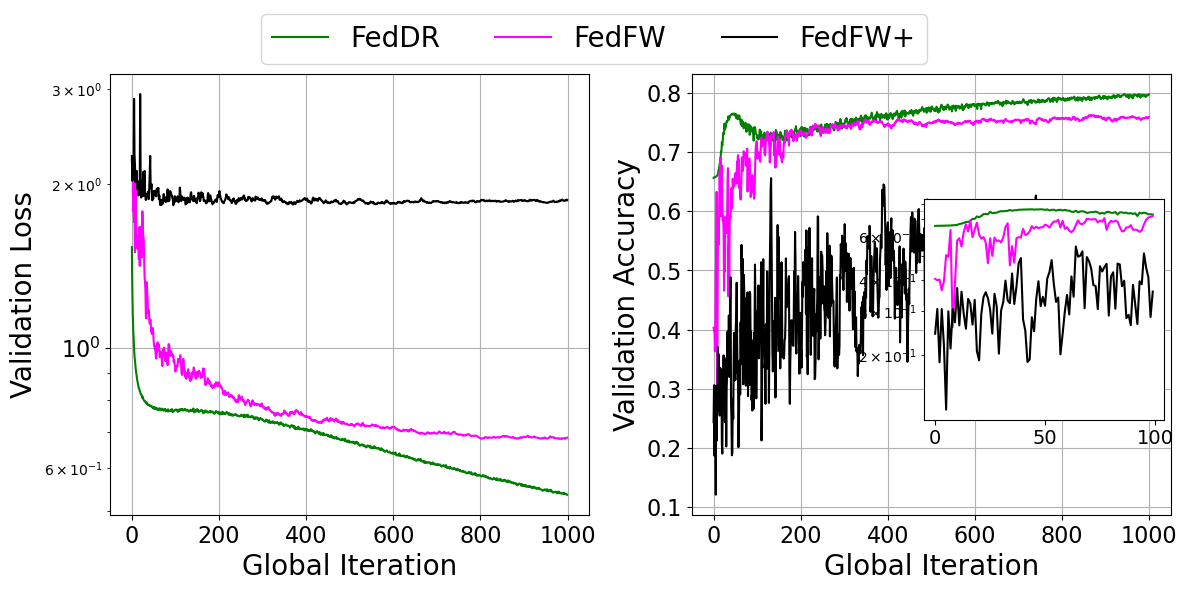

In [43]:
paths = [ '/proj/sourasb-220503/codebase/FedFWplus/results/FedDR/SYNTHETIC/MCLR/perf/norm_1/10/',
'/proj/sourasb-220503/codebase/FedFWplus/results/FedFW/SYNTHETIC/MCLR/perf/lmo_l1/3/',
'/proj/sourasb-220503/codebase/FedFWplus/results/FedFW_Plus/MNIST/MCLR/perf/lmo_l1/3/best/']
fig_path = '/proj/sourasb-220503/codebase/FedFWplus/results/convergence/synthetic/l1/'
# column_name = ['FedAvg+PGD', 'FedDR', 'FedFW', 'FedFW+']
column_name = ['FedDR', 'FedFW', 'FedFW+']
convergence_analysis(paths, fig_path, column_name)